# Create map pickles

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Load mesh file:

In [2]:
mesh         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = np.array(mesh.variables['nav_lon'])
mesh_lat     = np.array(mesh.variables['nav_lat'])
mesh_bathy   = np.array(mesh.variables['tmask'][0,:,:,:])
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)
depths       = np.array(mesh.variables['nav_lev'])

In [3]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
hdept = np.array(mesh.variables['hdept'][0])

In [4]:
land_color         = '#a9a7a2'
land_outline_color = '#373736'

light_land      = '#d0d0cf'
light_land_edge = '#929291'

### Maps

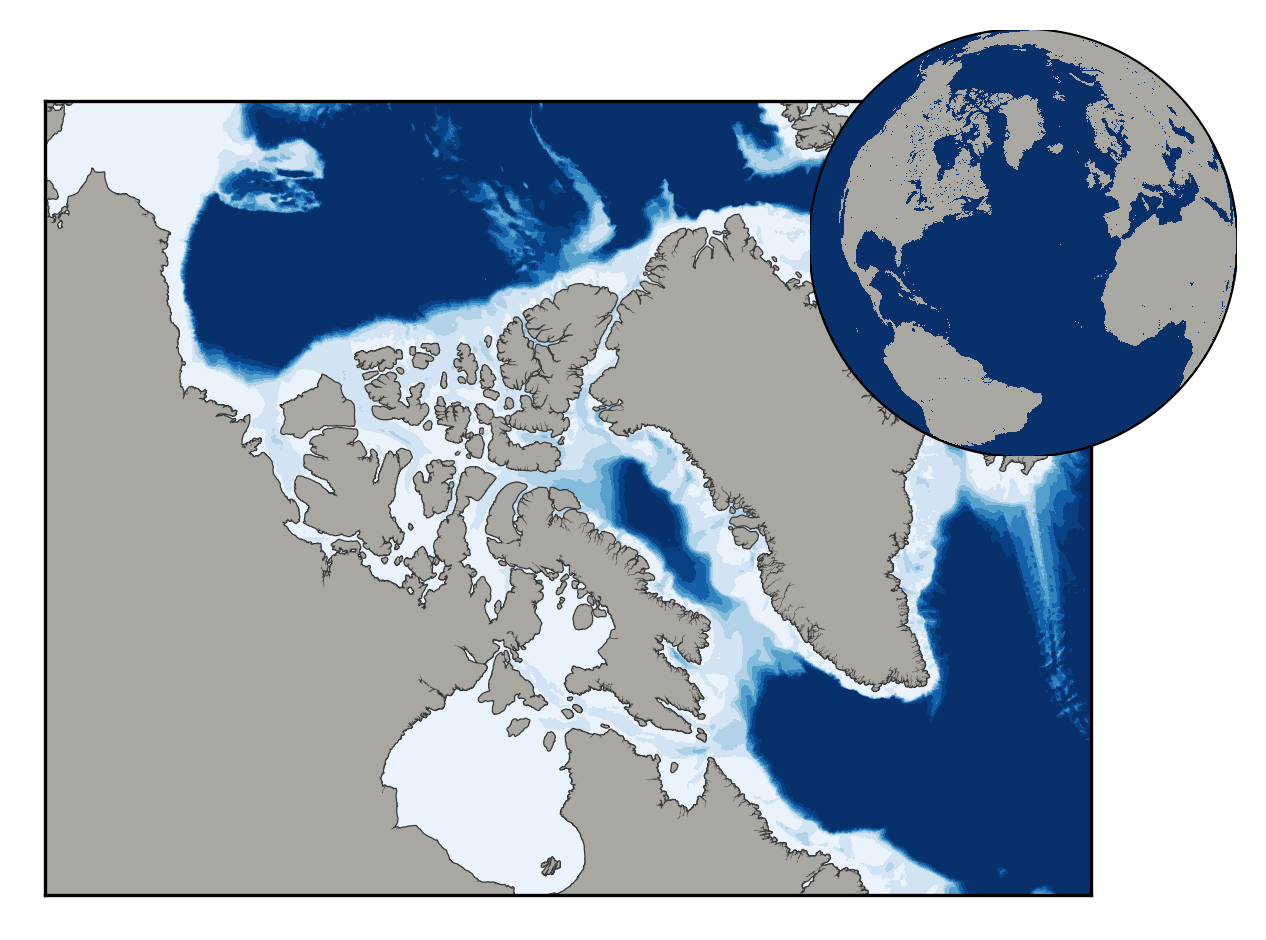

In [7]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73.3, lon_0 = -78, resolution='i', width=5.4e6, height=4.1e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=0.6);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(mesh_lon, mesh_lat)
bath   = proj1.contourf(x_model, y_model, hdept, 20, cmap=matplotlib.cm.get_cmap('Blues'), vmin=0, vmax=2000, zorder=1)

ax2   = fig.add_axes([0.66, 0.54, 0.38, 0.38])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
# proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = land_color, ocean_color="#08306b", resolution = 'h',zorder=2) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/Pb-map-globe.pickle','wb'))

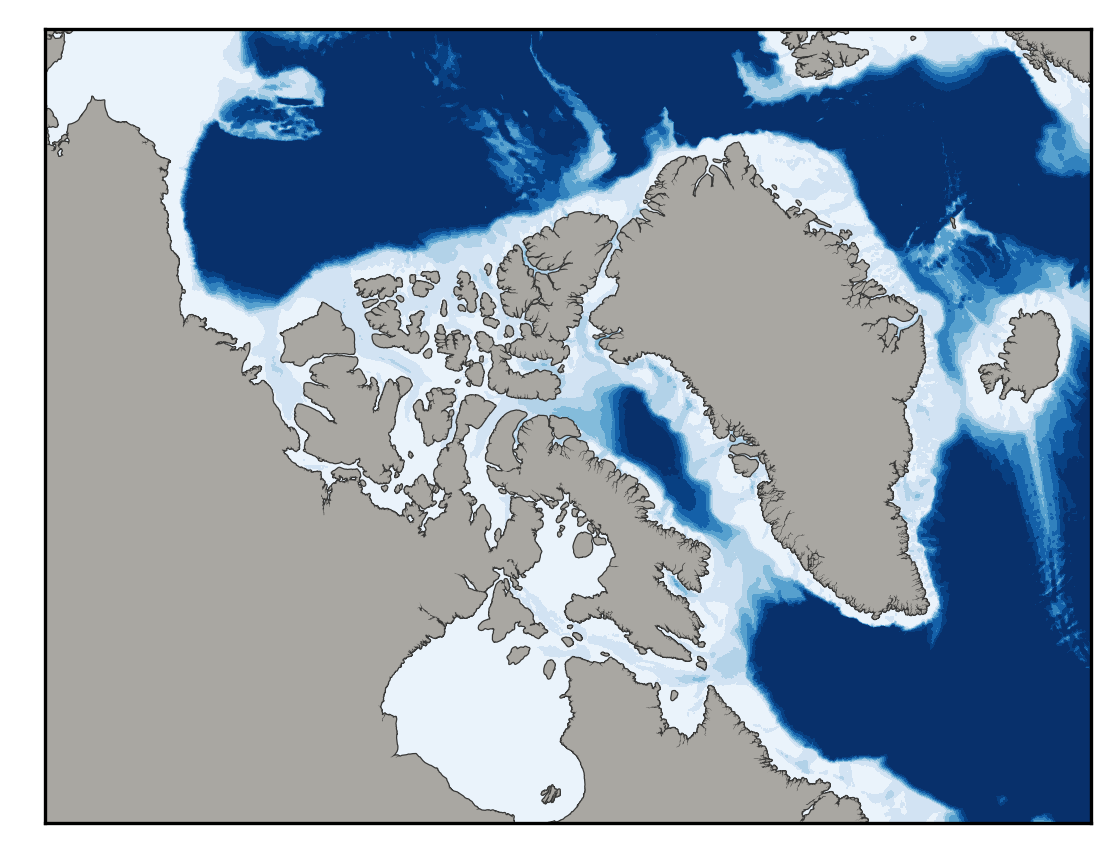

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73.3, lon_0 = -78, resolution='i', width=5.4e6, height=4.1e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=0.6);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(mesh_lon, mesh_lat)
bath   = proj1.contourf(x_model, y_model, hdept, 20, cmap=matplotlib.cm.get_cmap('Blues'), vmin=0, vmax=2000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb-map-noglobe.pickle','wb'))

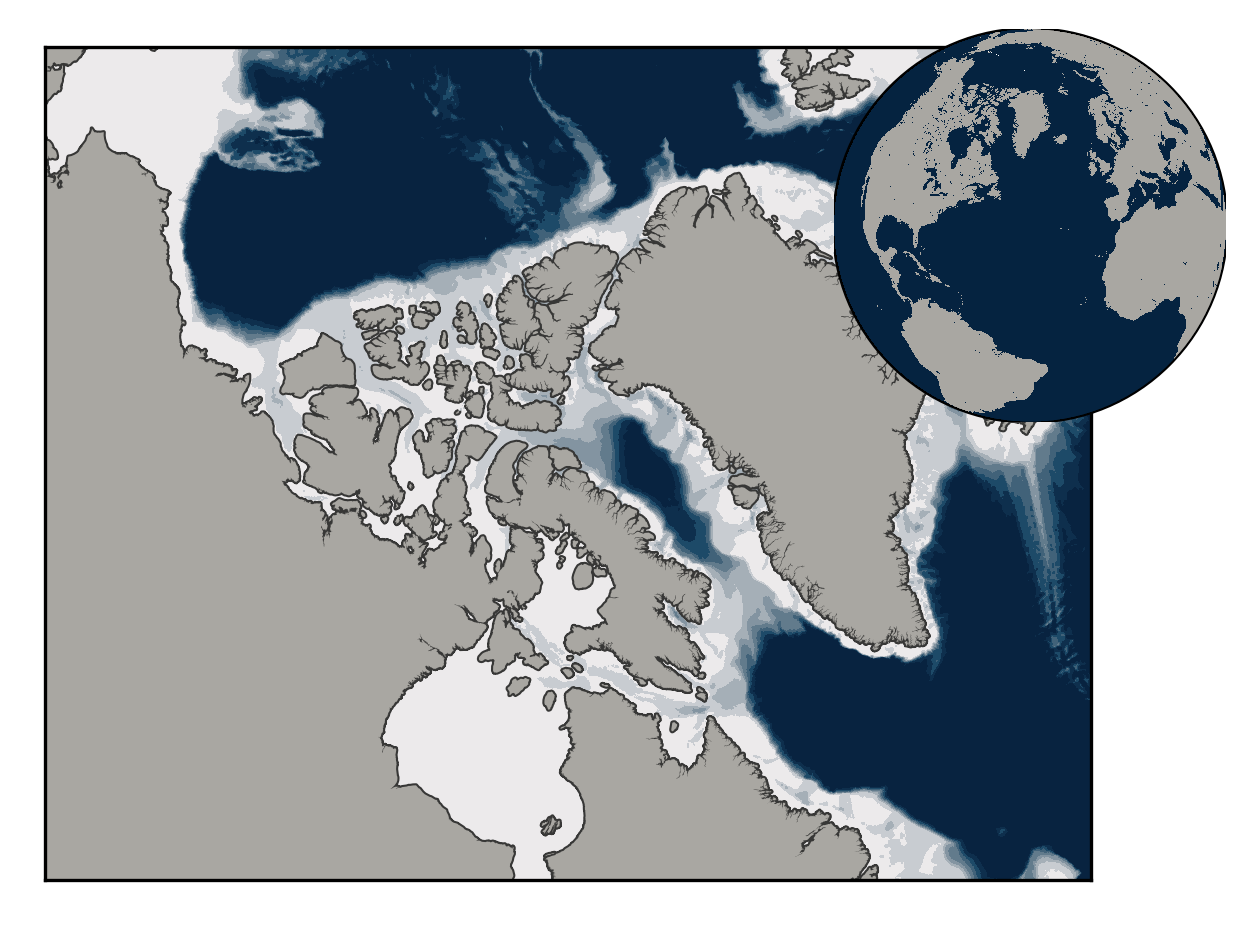

In [30]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(mesh_lon, mesh_lat)
bath   = proj1.contourf(x_model, y_model, hdept, 20, cmap=cmocean.cm.diff_r, vmin=-2000, vmax=2000, zorder=1)

ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = land_color, ocean_color="#052340", resolution = 'h',zorder=2) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb-map-globe.pickle','wb'))

In [ ]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 78, lon_0 = -130, resolution='i', width=2.3e6, height=2.1e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Canada-Basin.pickle','wb'))

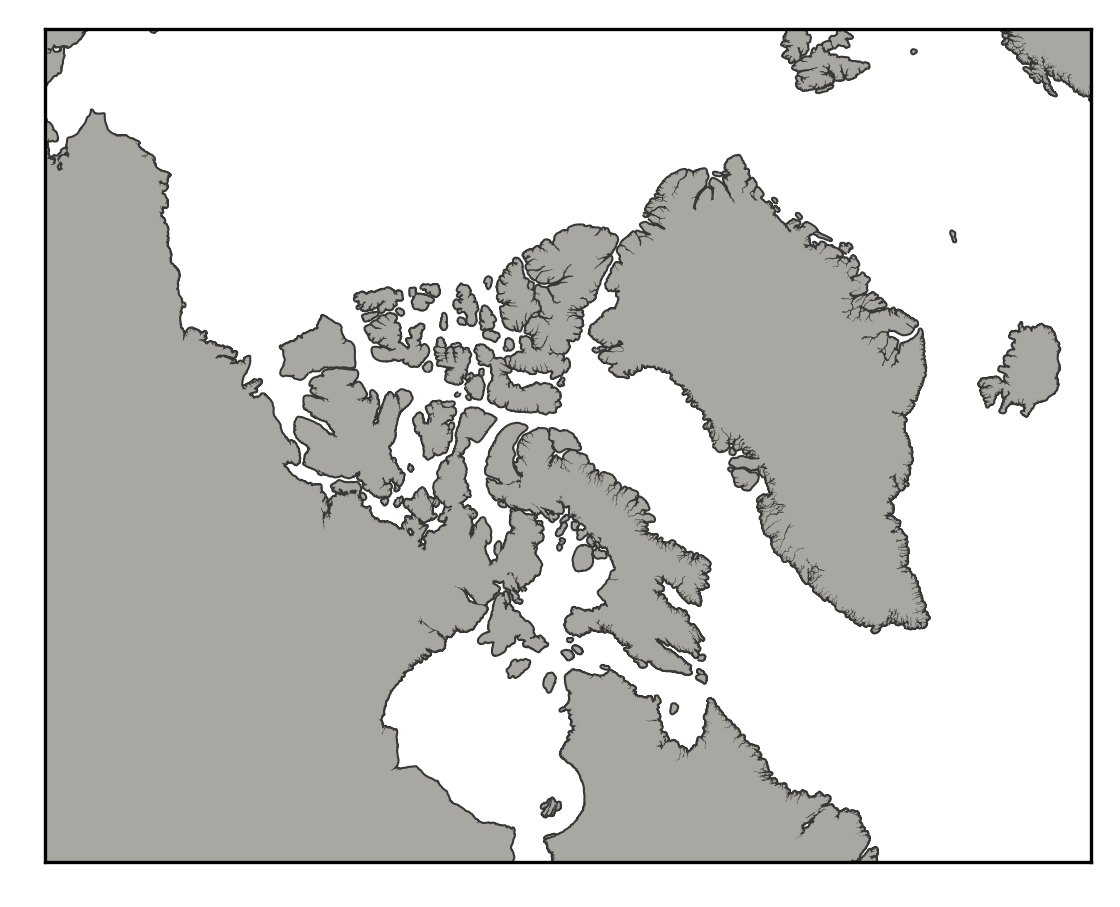

In [6]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb-map.pickle','wb'))

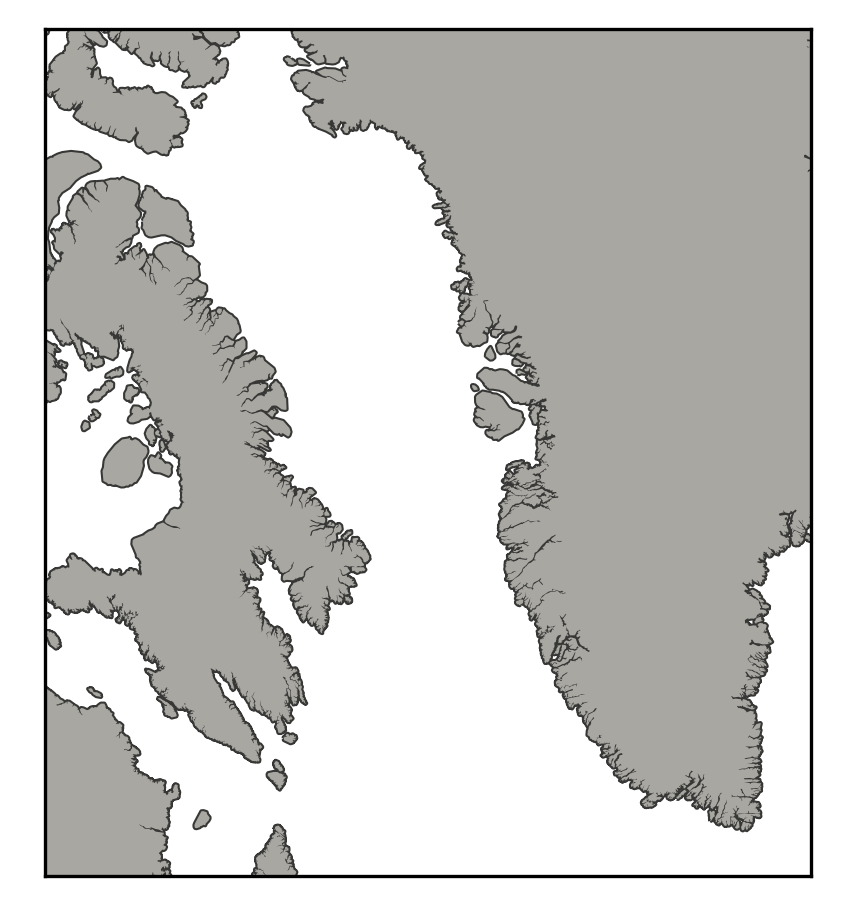

In [9]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -58, resolution='i', width=1.9e6, height=2.1e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Baffin-Bay-zoom.pickle','wb'))

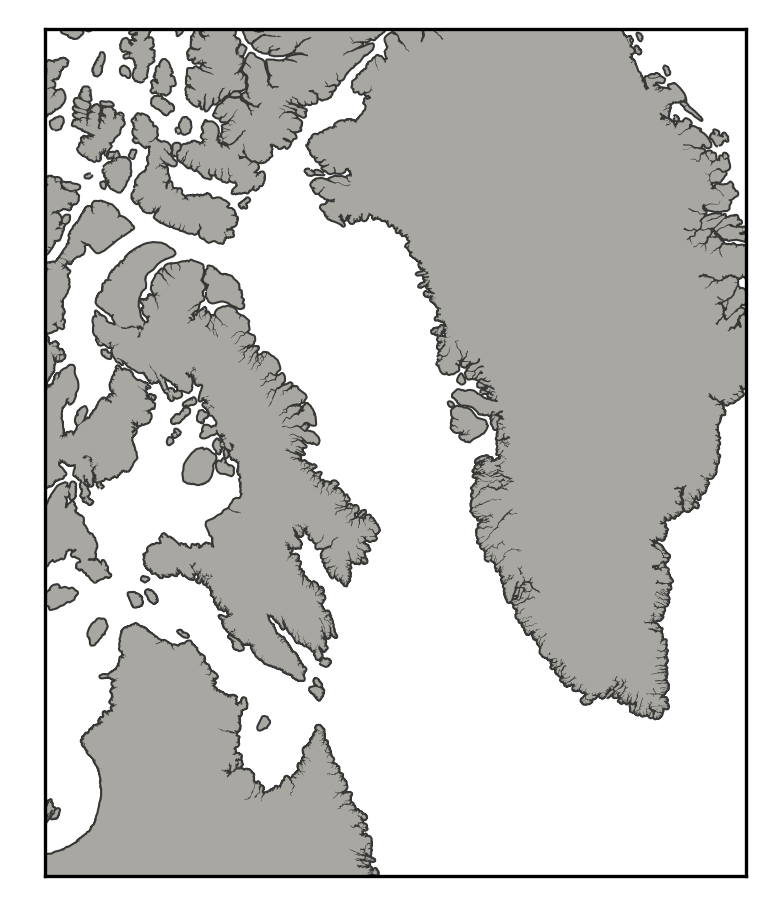

In [8]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -60, resolution='i', width=2.4e6, height=2.9e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Baffin-Bay.pickle','wb'))

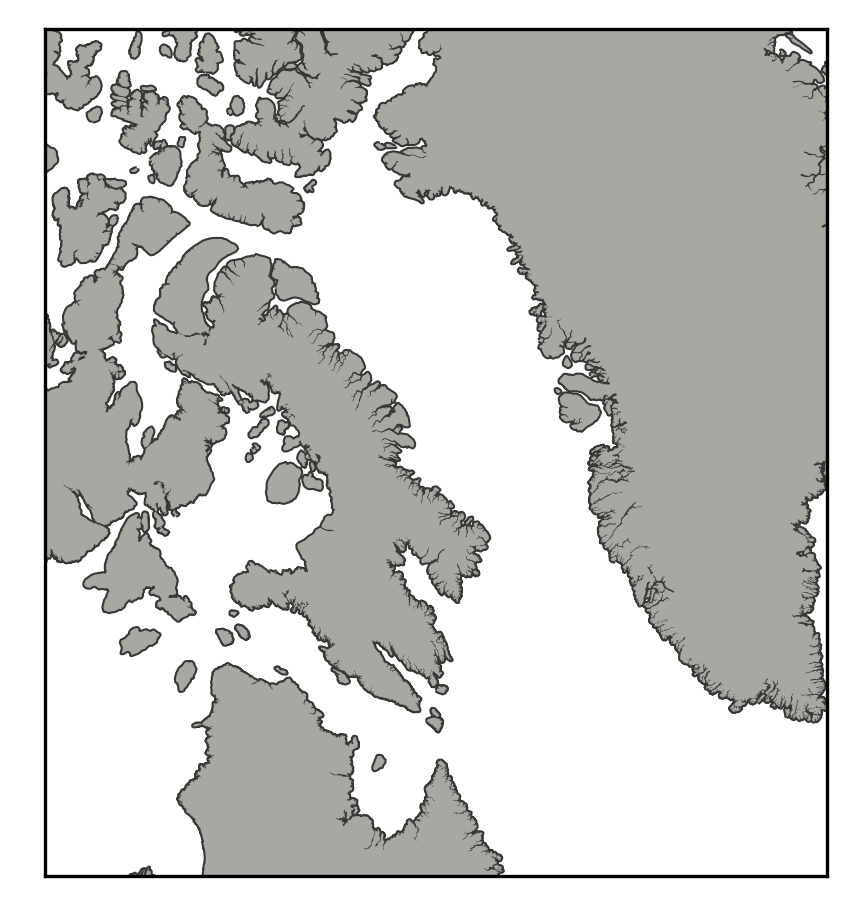

In [6]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -65, resolution='i', width=2.4e6, height=2.6e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/LS.pickle','wb'))

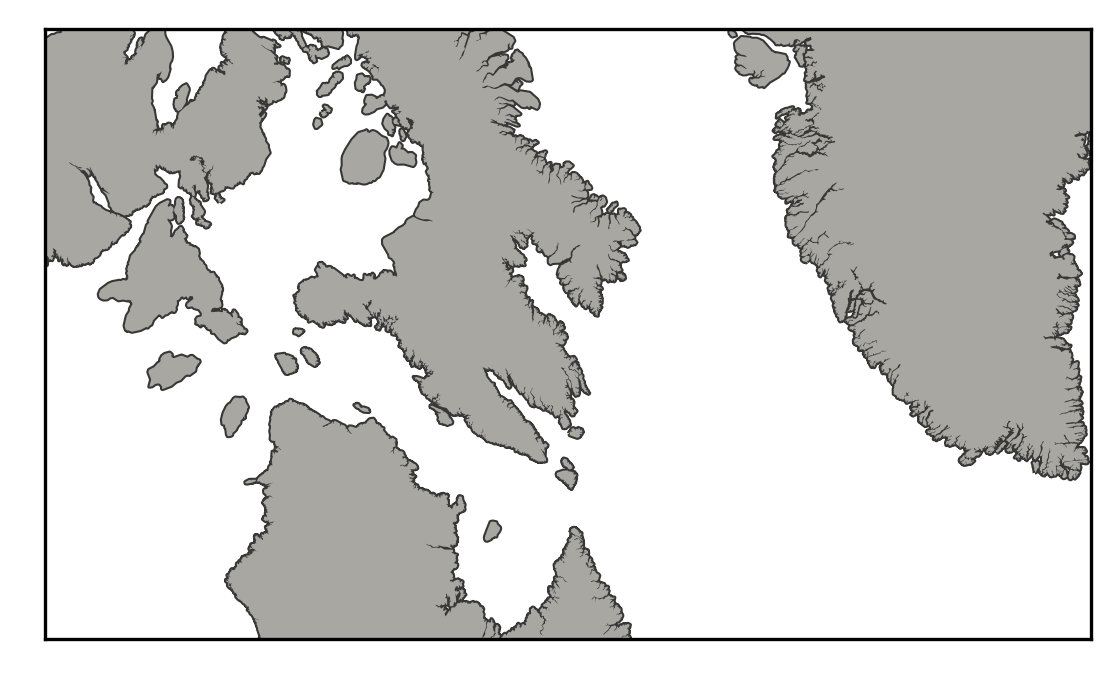

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 64.5, lon_0 = -65, resolution='i', width=2.4e6, height=1.4e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/HB.pickle','wb'))

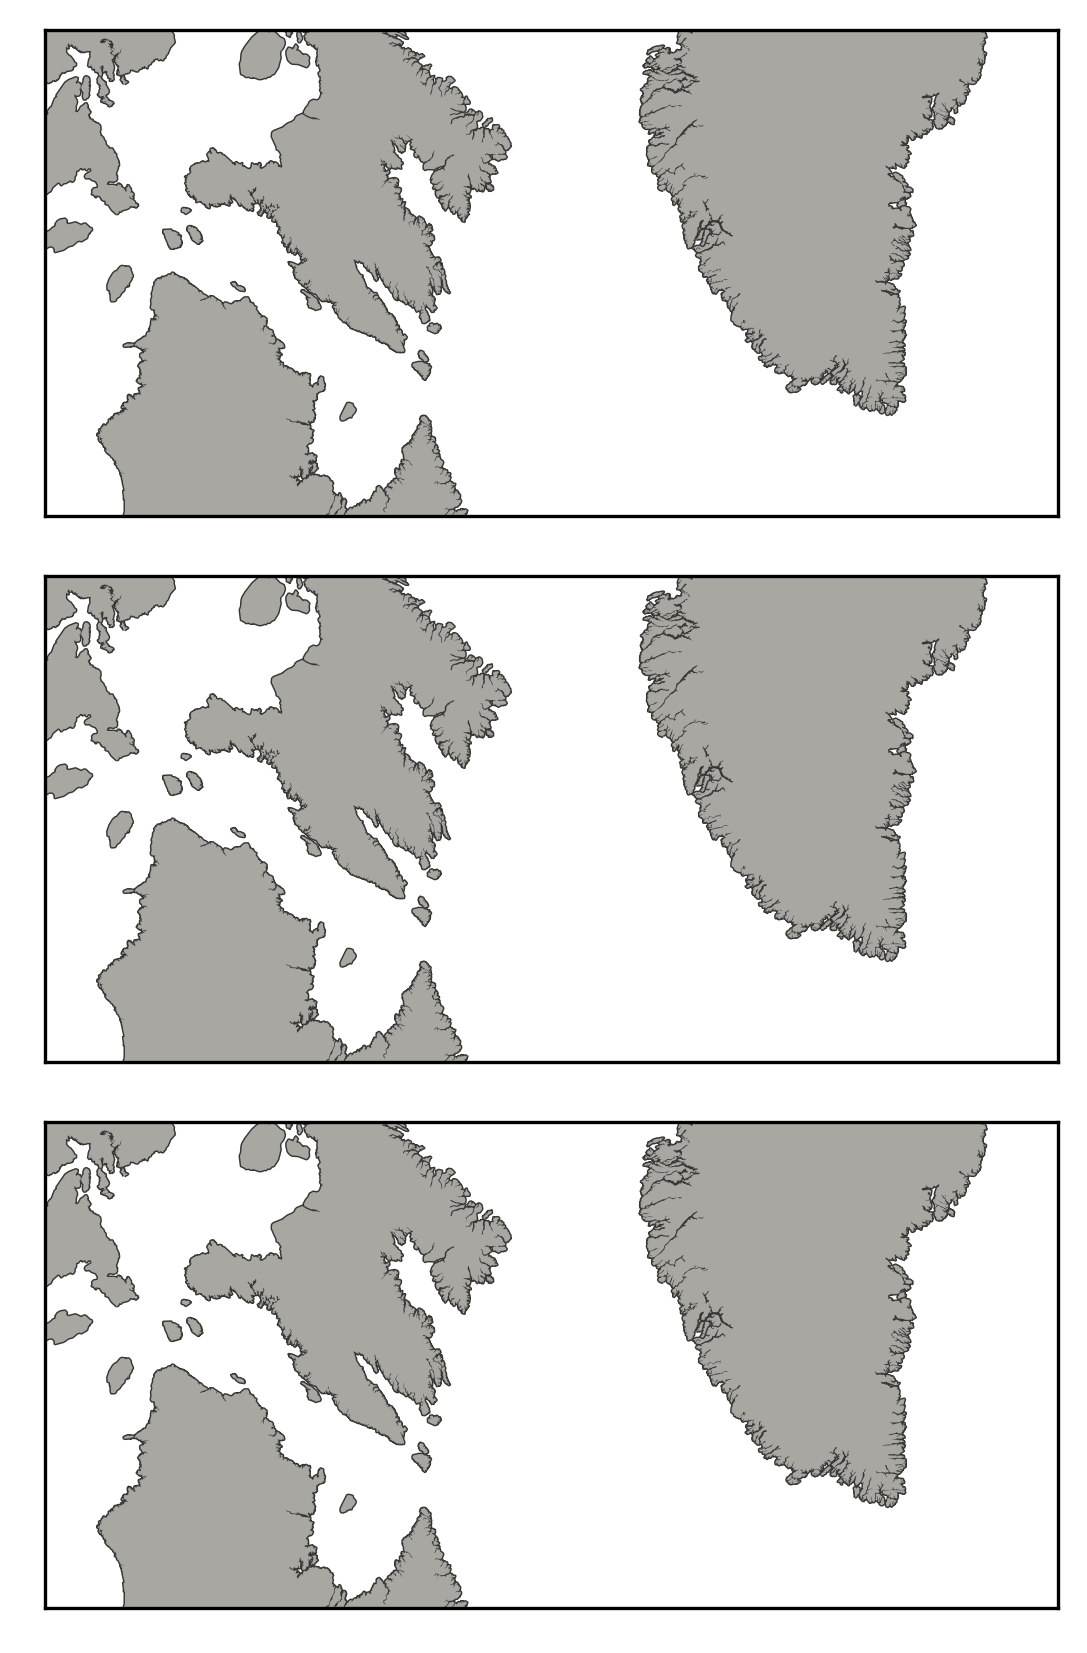

In [10]:
fig, ax = plt.subplots(3,1, figsize=(4.5, 3.74*1.5), dpi=300)

for axis in ax.ravel():    
    proj1=Basemap(projection='eqdc',lat_0 = 63.8, lon_0 = -59, resolution='i', width=2.5e6, height=1.2e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=0.7);
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

plt.tight_layout()

# pickle the class instance.
pickle.dump((fig, ax, proj1), open('/ocean/brogalla/GEOTRACES/pickles/HB3.pickle','wb'))

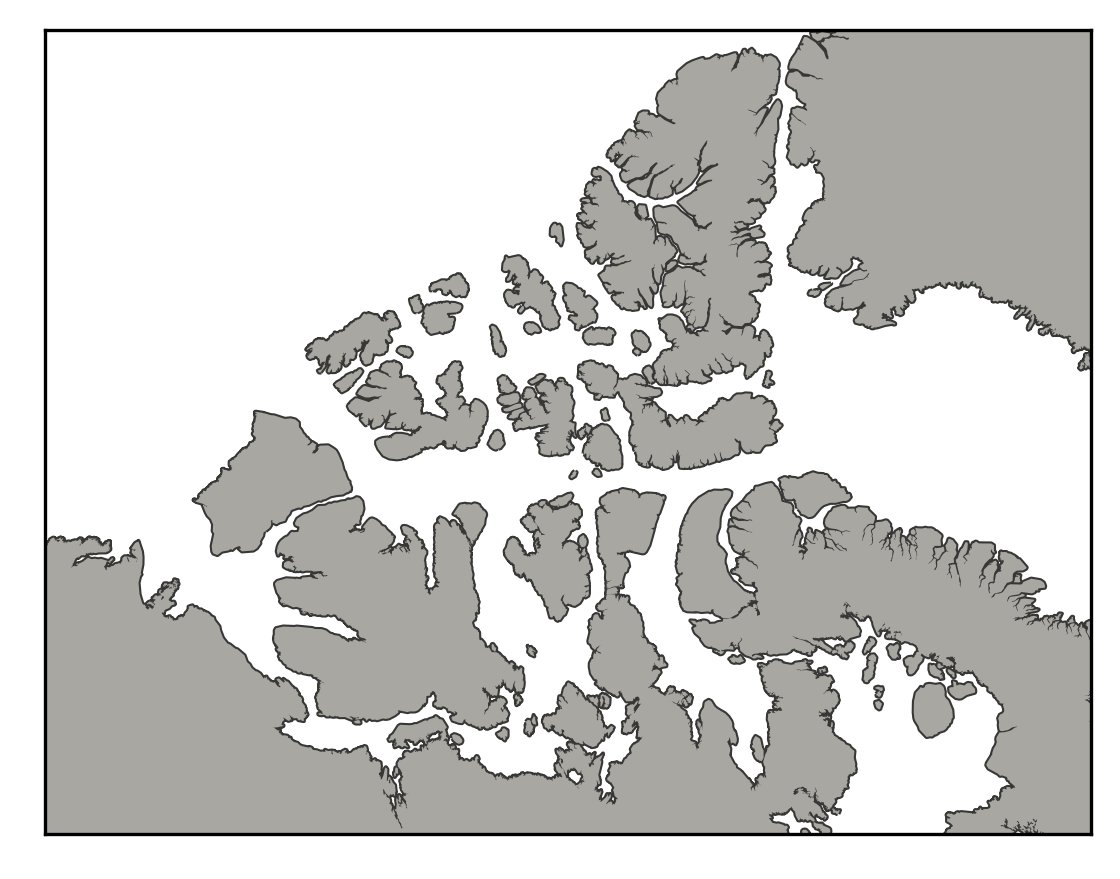

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 75.5, lon_0 = -98, resolution='i', width=2.6e6, height=2.0e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb-CAA-zoom.pickle','wb'))

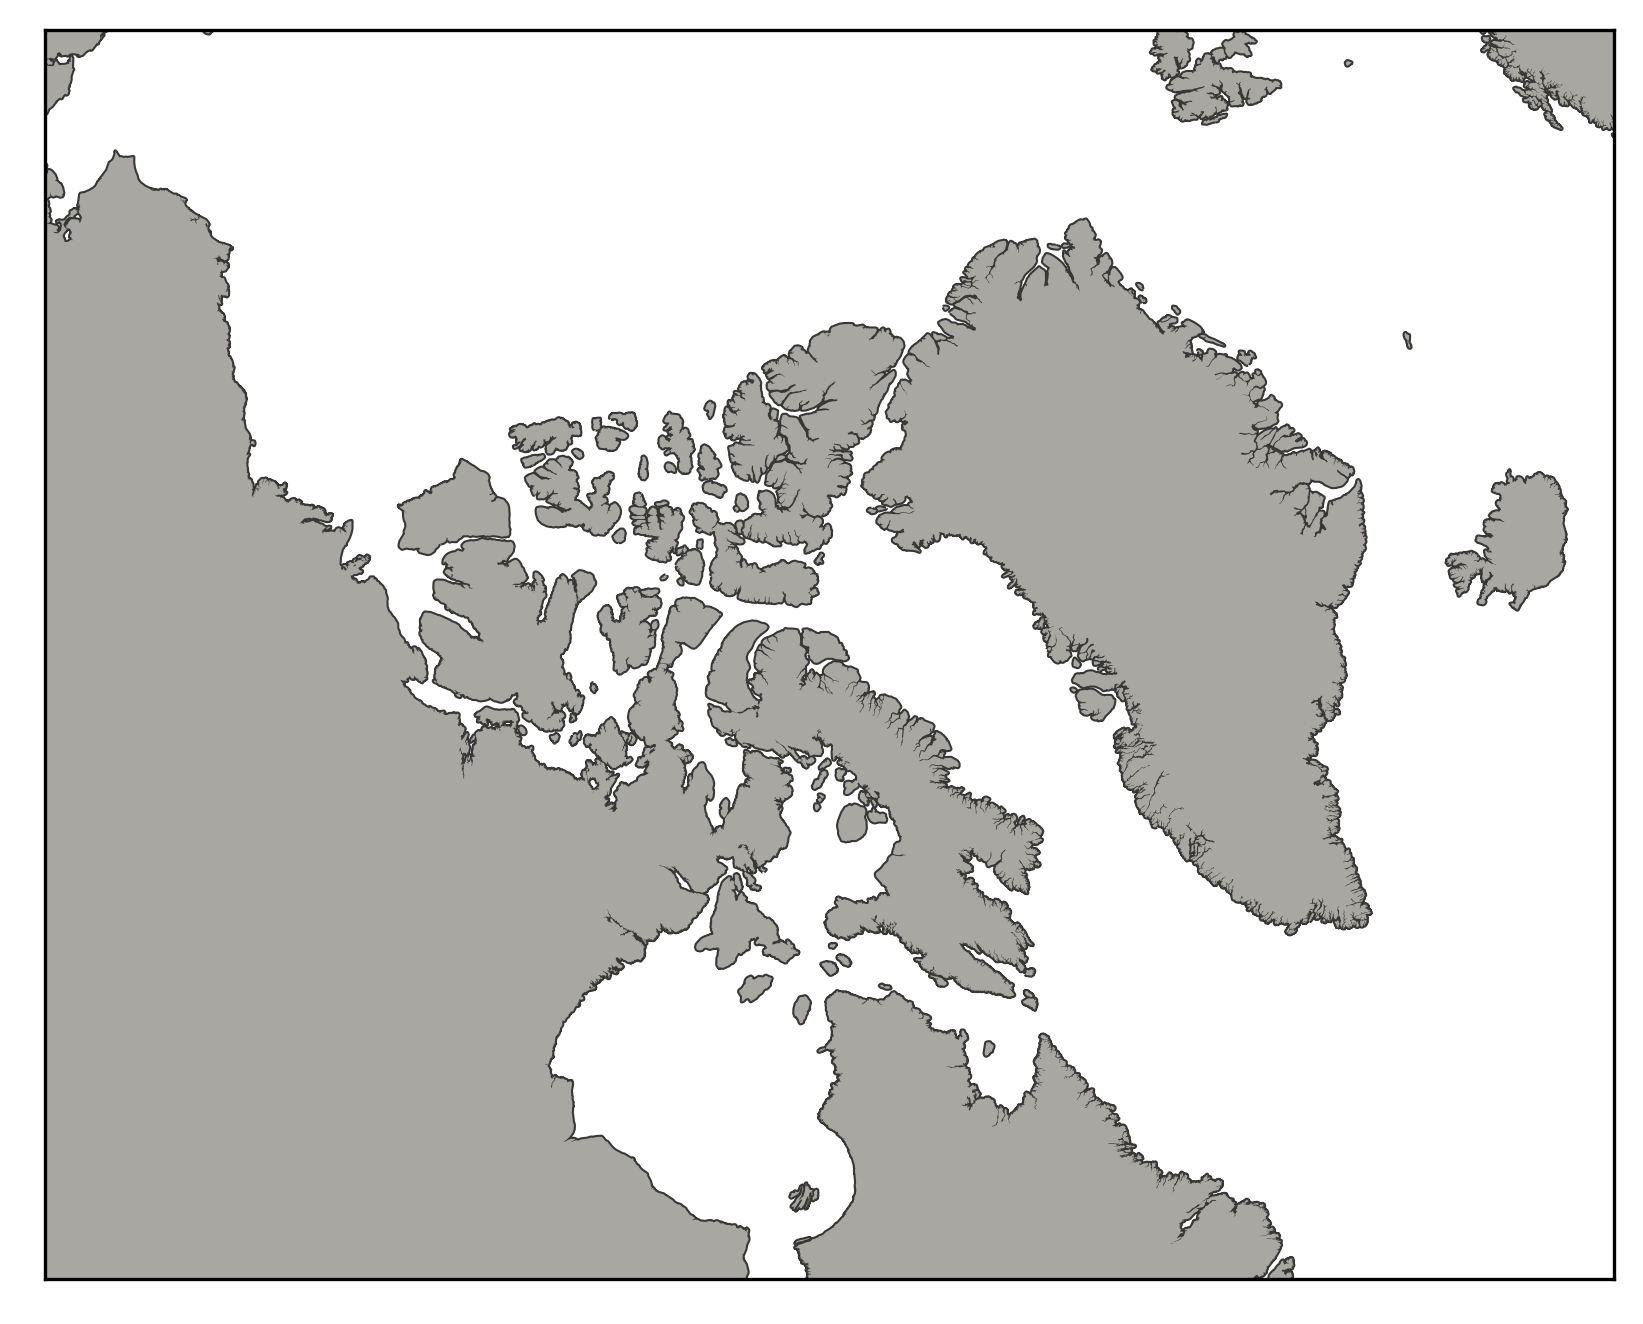

In [8]:
fig, ax1 = plt.subplots(figsize=(4.5*1.5, 3.74*1.5), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb-eval.pickle','wb'))

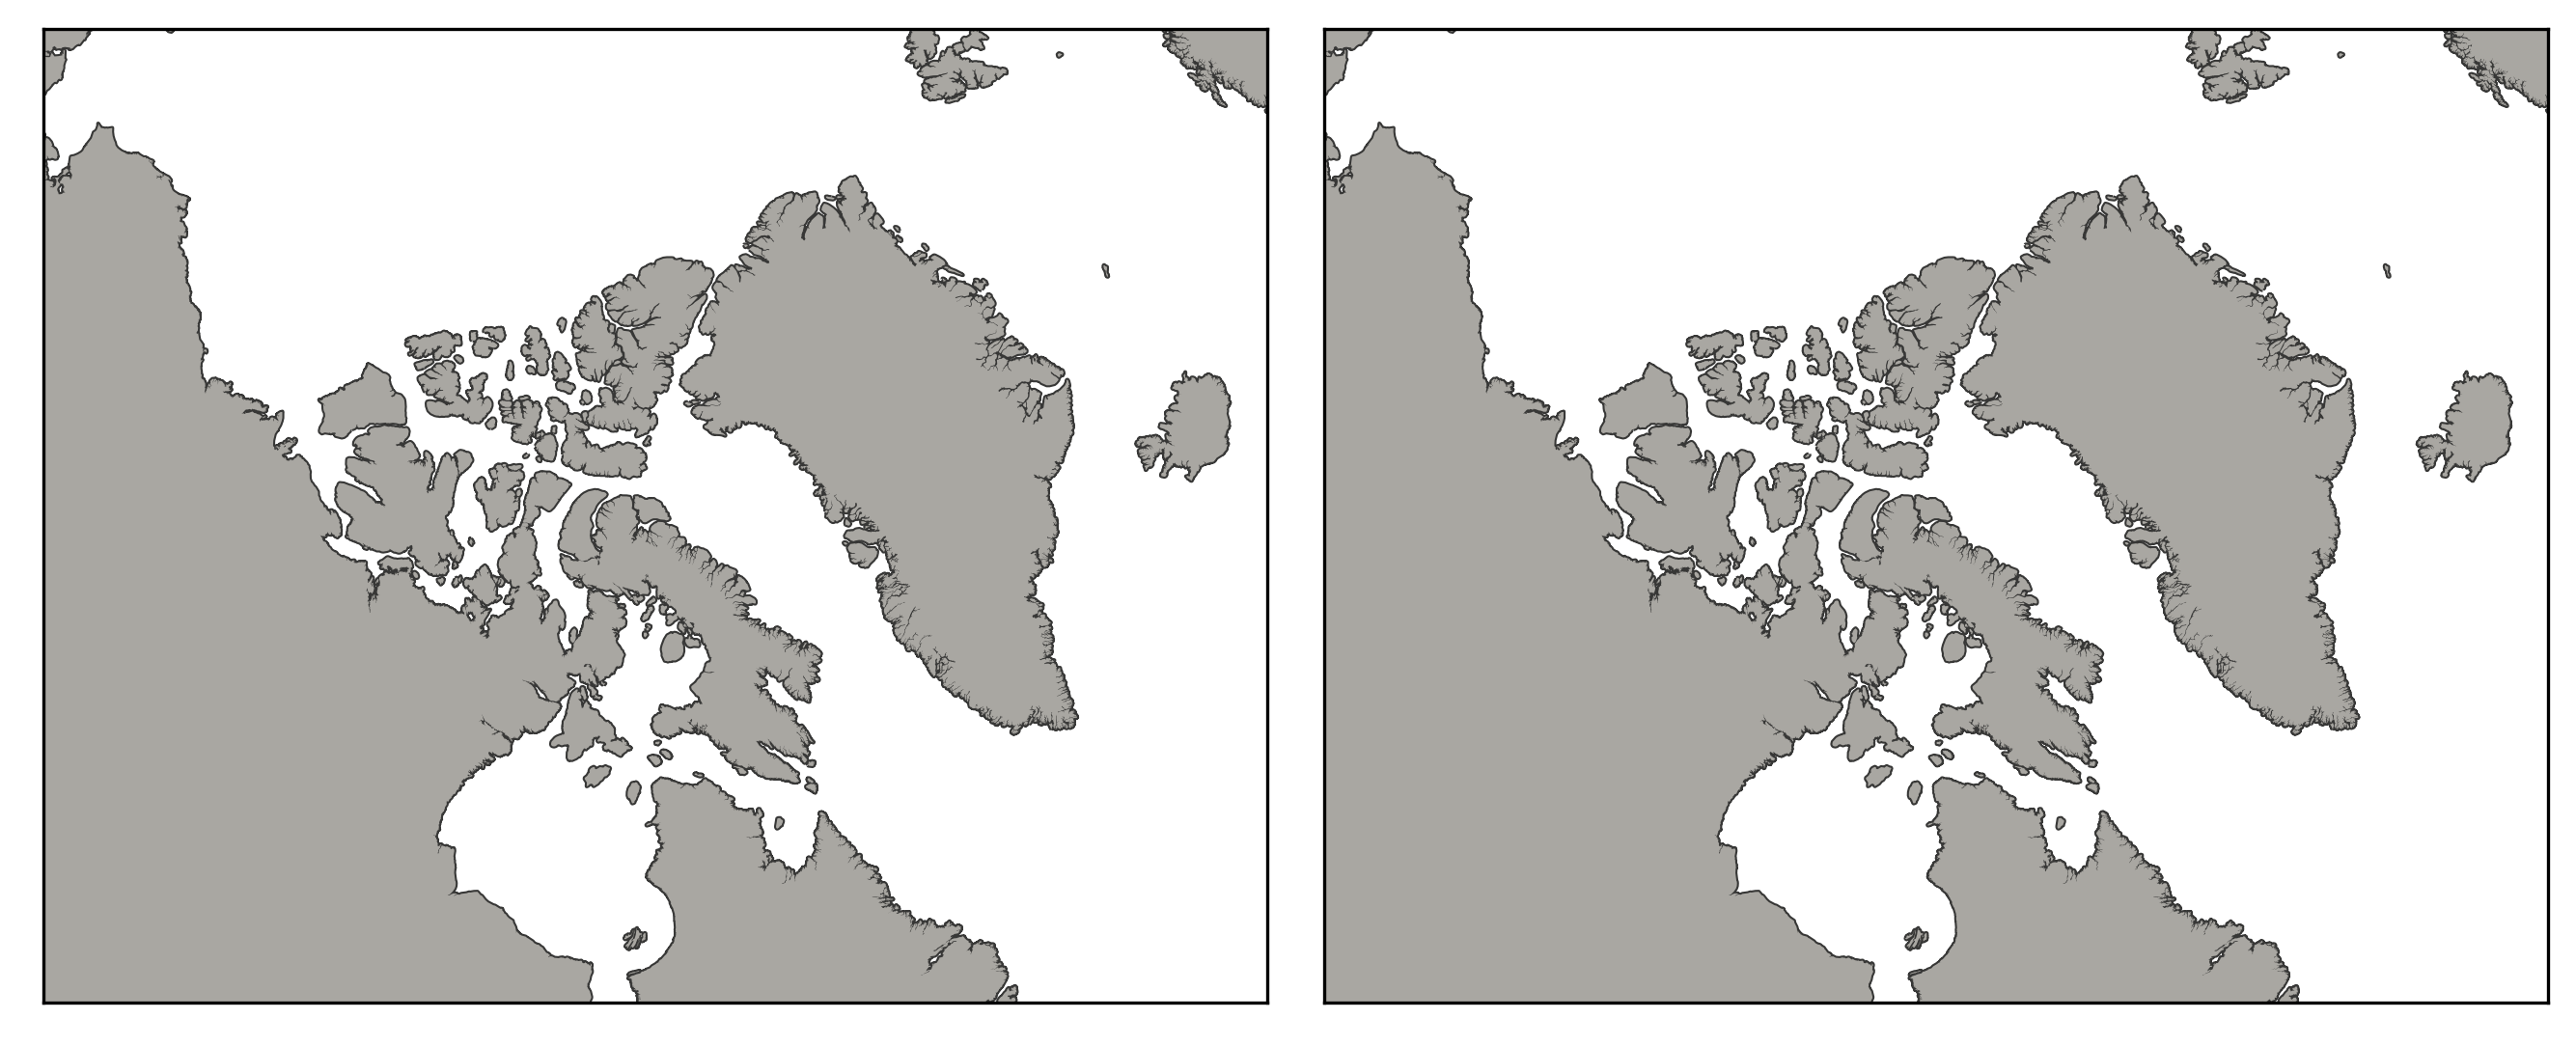

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(4.5*2, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=ax2)
proj2.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

plt.tight_layout()

# pickle the class instance.
pickle.dump((fig, ax1, ax2, proj1, proj2), open('/ocean/brogalla/GEOTRACES/pickles/Pb-double.pickle','wb'))

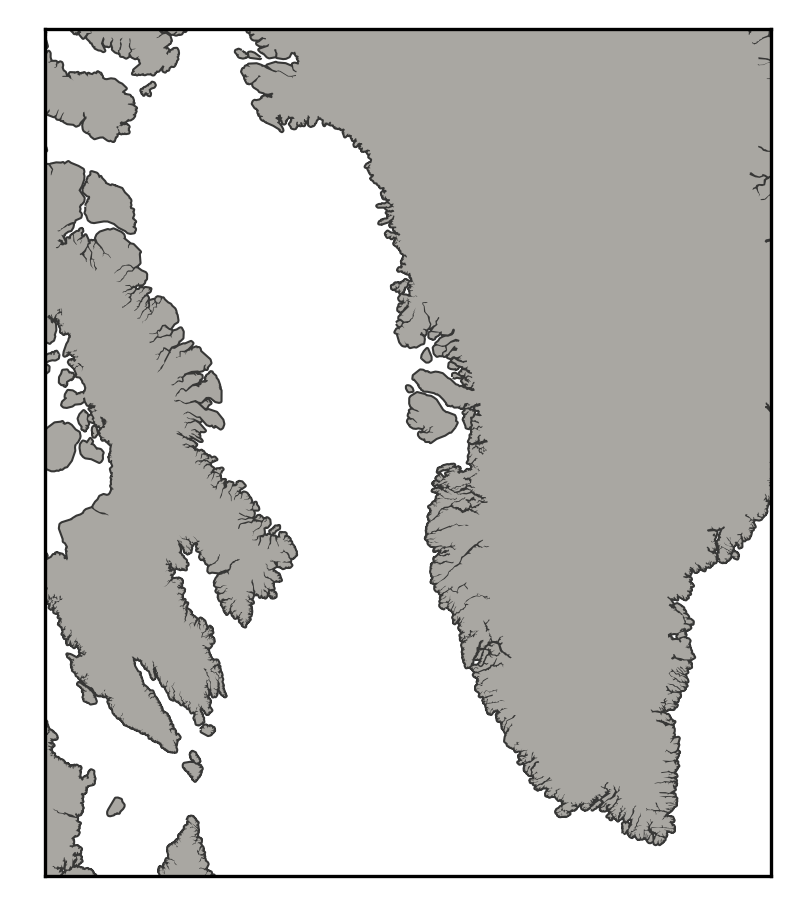

In [5]:
fig, ax1 = plt.subplots(1,1, figsize=(4.5, 3.74), dpi=300)

proj1=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -55, resolution='i', width=1.8e6, height=2.1e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb-Baffin.pickle','wb'))

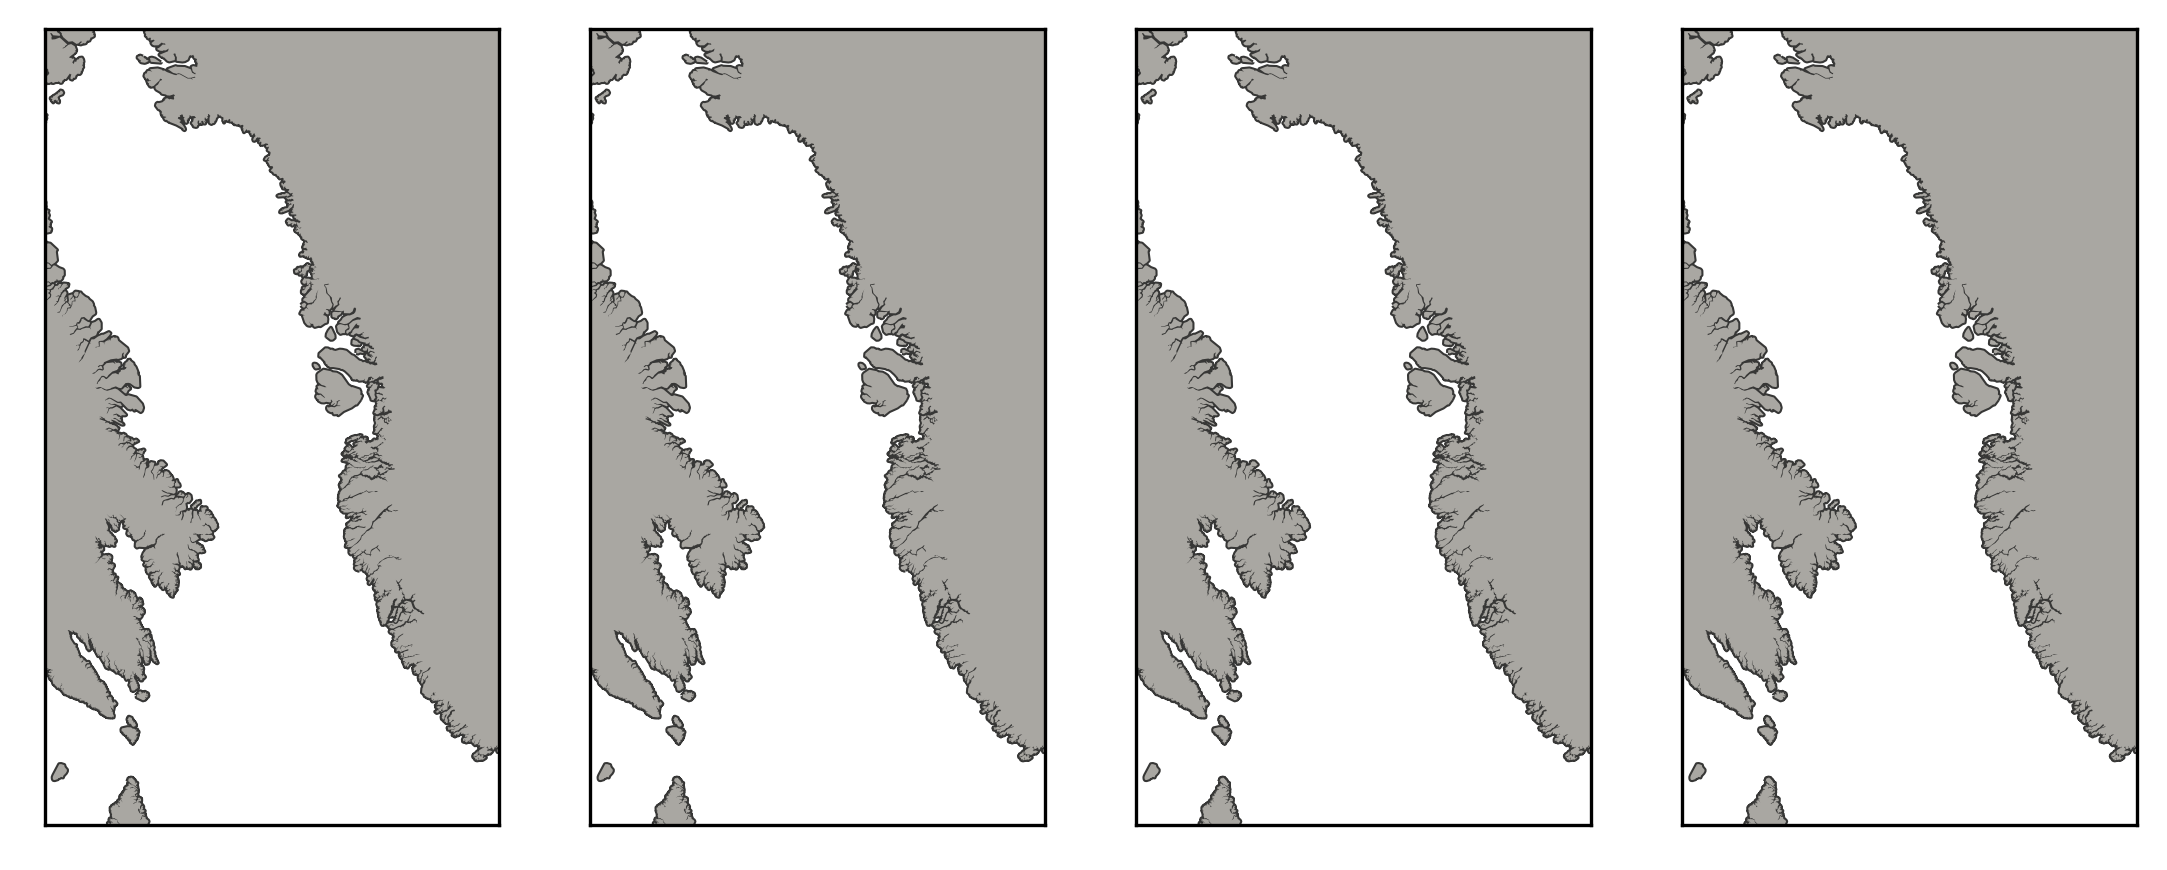

In [11]:
fig, ax1 = plt.subplots(1,4, figsize=(4.5*2, 3.74), dpi=300)

for axis in ax1.ravel():
    proj1=Basemap(projection='eqdc',lat_0 = 69, lon_0 = -58, resolution='i', width=1.2e6, height=2.1e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb4.pickle','wb'))

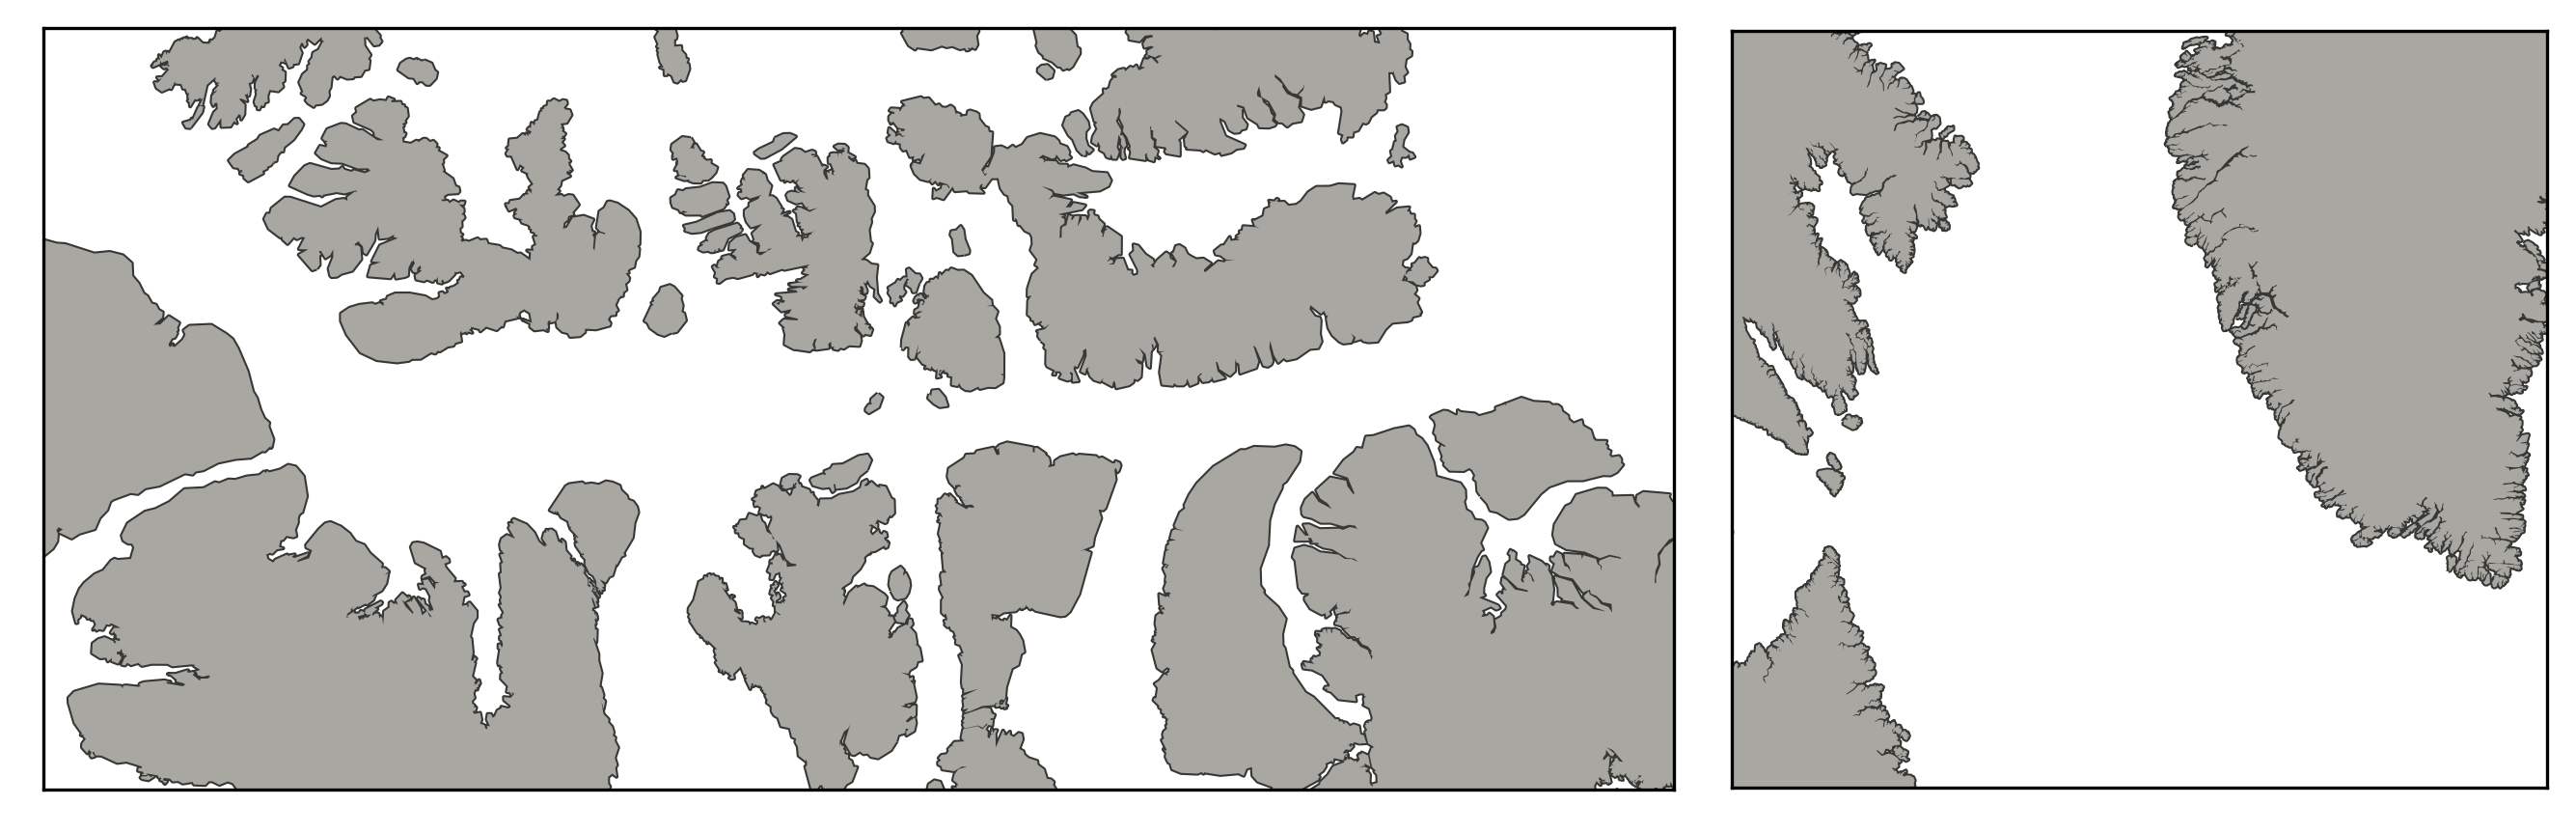

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(4.5*2, 3.74), dpi=300, gridspec_kw={'width_ratios': [2, 1]})

proj1=Basemap(projection='eqdc',lat_0 = 74.5, lon_0 = -98, resolution='i', width=1.5e6, height=0.7e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

proj2=Basemap(projection='eqdc',lat_0 = 63, lon_0 = -55, resolution='i', width=1.4e6, height=1.3e6, ax=ax2)
proj2.drawcoastlines(color=land_outline_color, linewidth=1.0);
proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

plt.tight_layout()

# pickle the class instance.
pickle.dump((fig, ax1, ax2, proj1, proj2), open('/ocean/brogalla/GEOTRACES/pickles/Pb-tracks2.pickle','wb'))

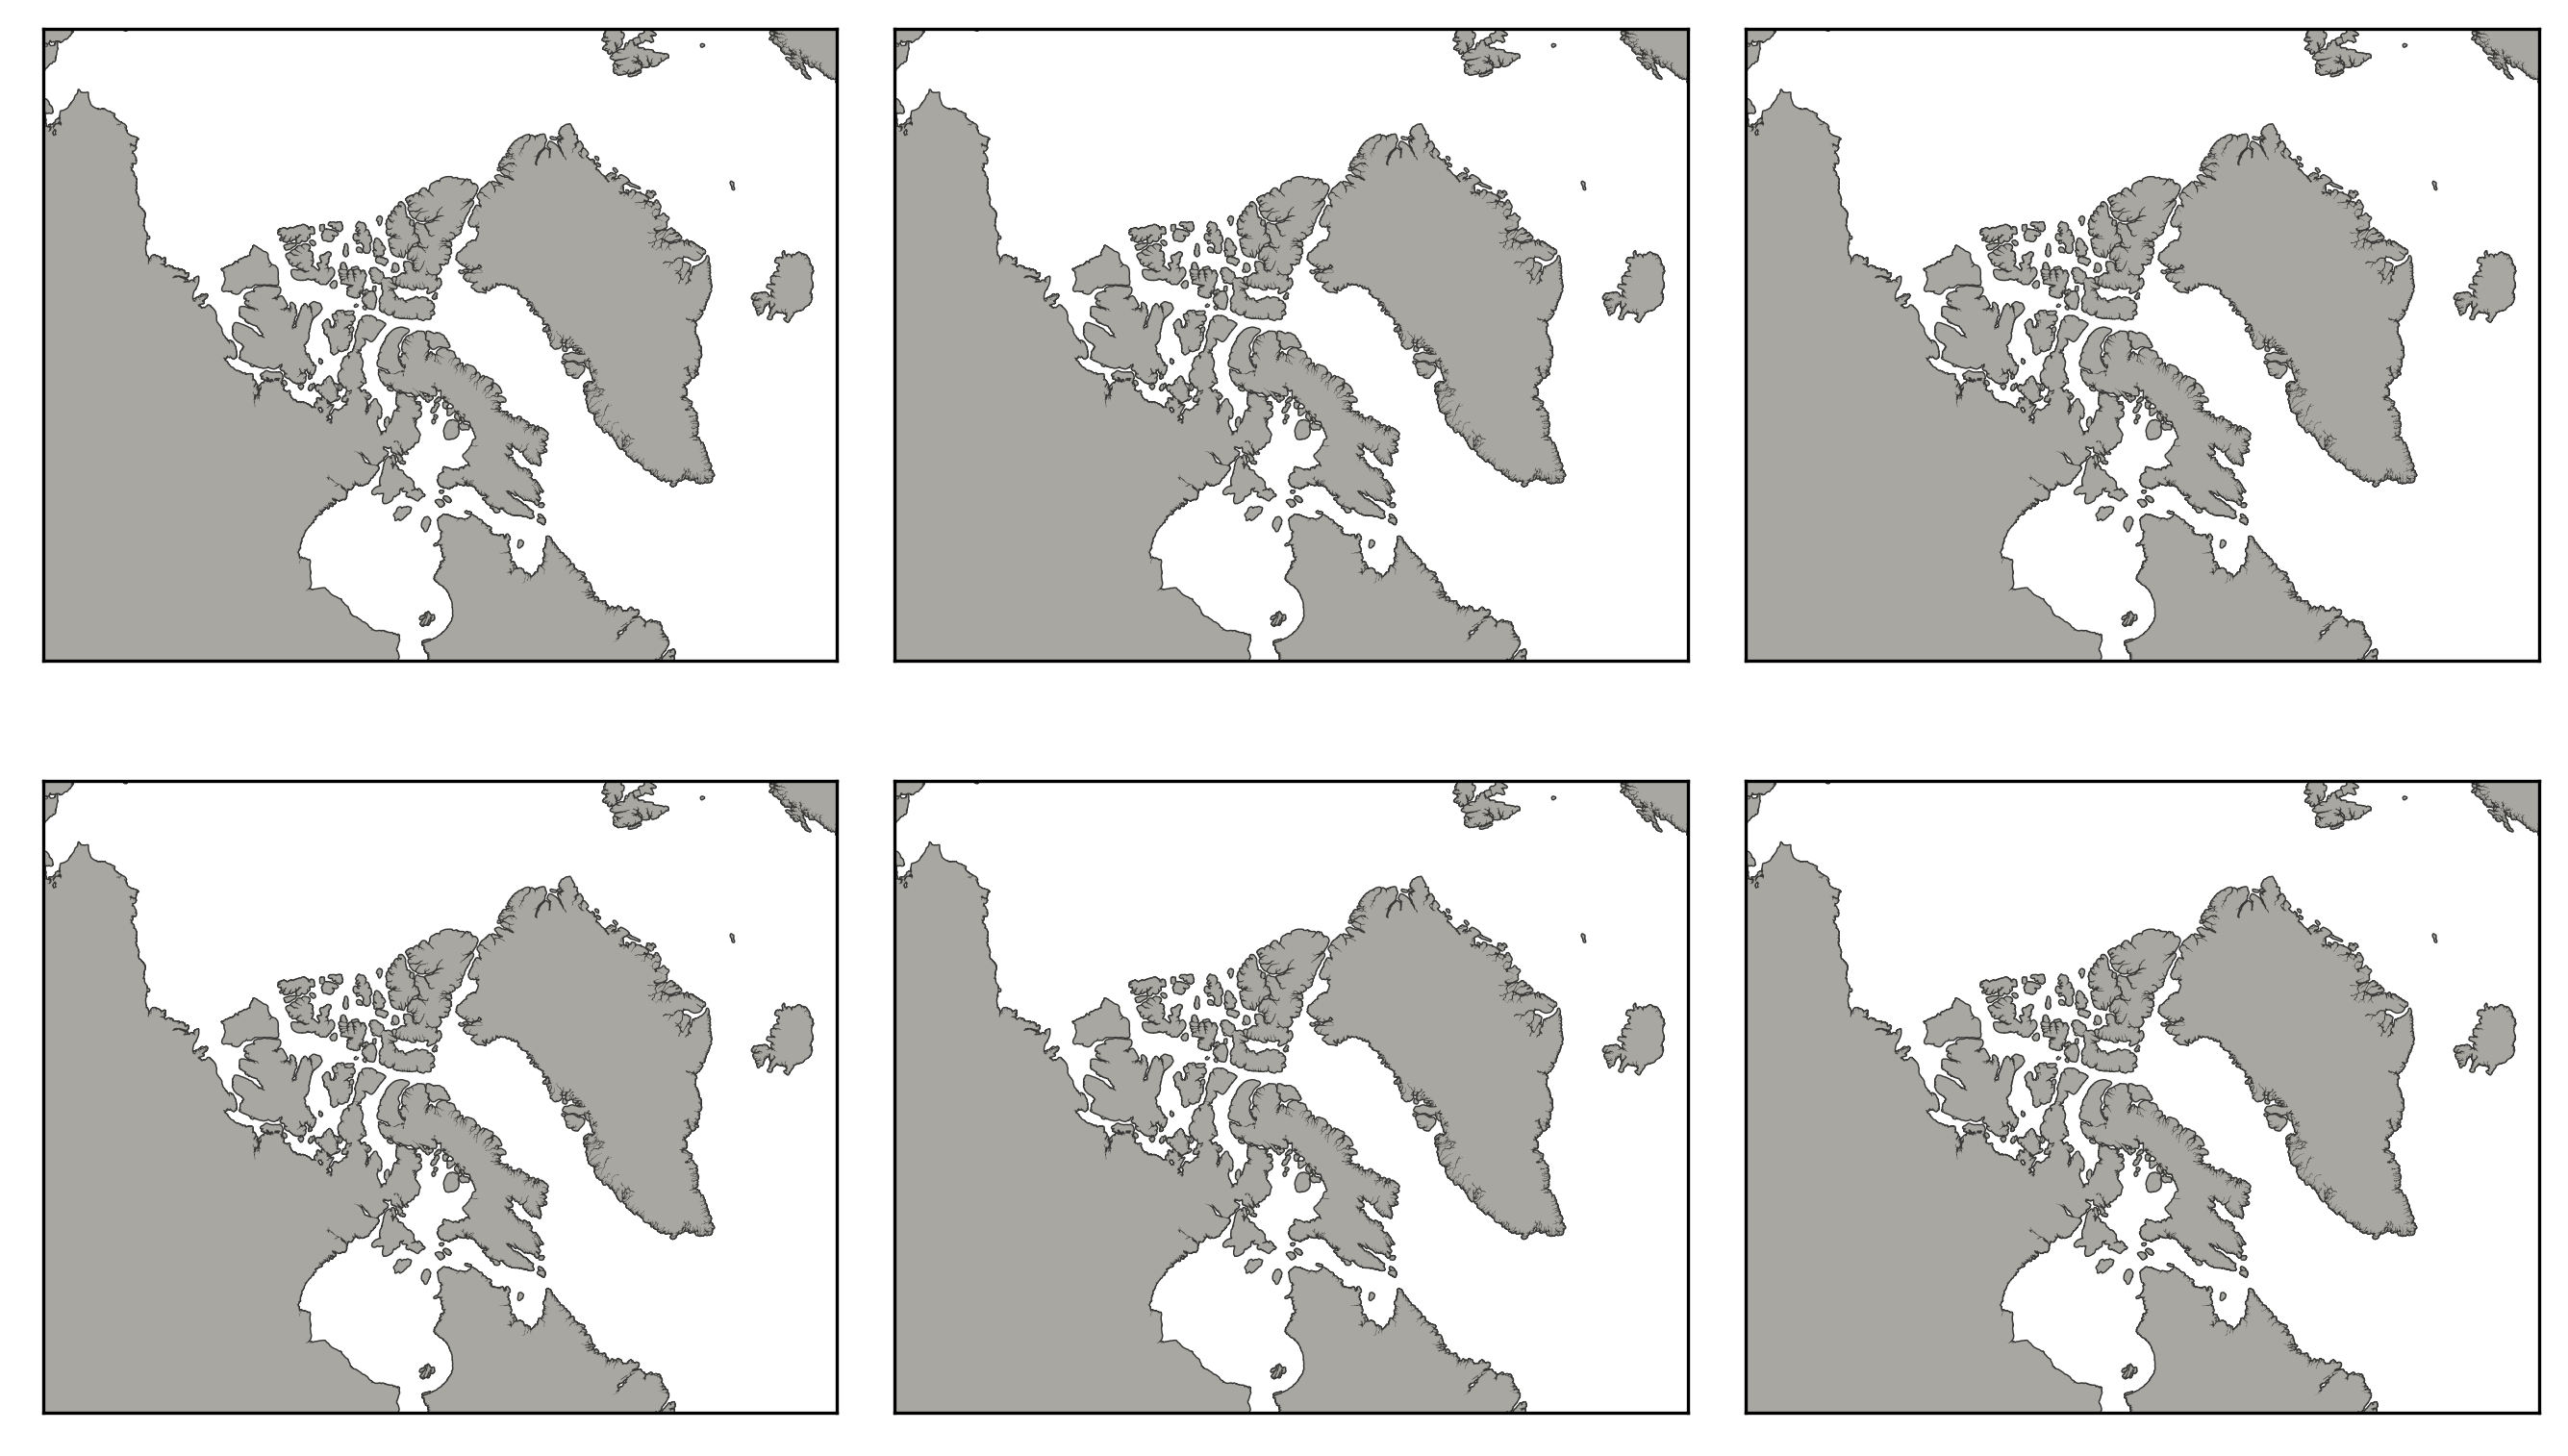

In [13]:
fig, ax = plt.subplots(2,3, figsize=(4.5*2, 3.74*1.5), dpi=300)

for axis in ax.ravel():    
    proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -78, resolution='i', width=5.4e6, height=4.3e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=0.7);
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

plt.tight_layout()

# pickle the class instance.
pickle.dump((fig, ax, proj1), open('/ocean/brogalla/GEOTRACES/pickles/Pb6.pickle','wb'))

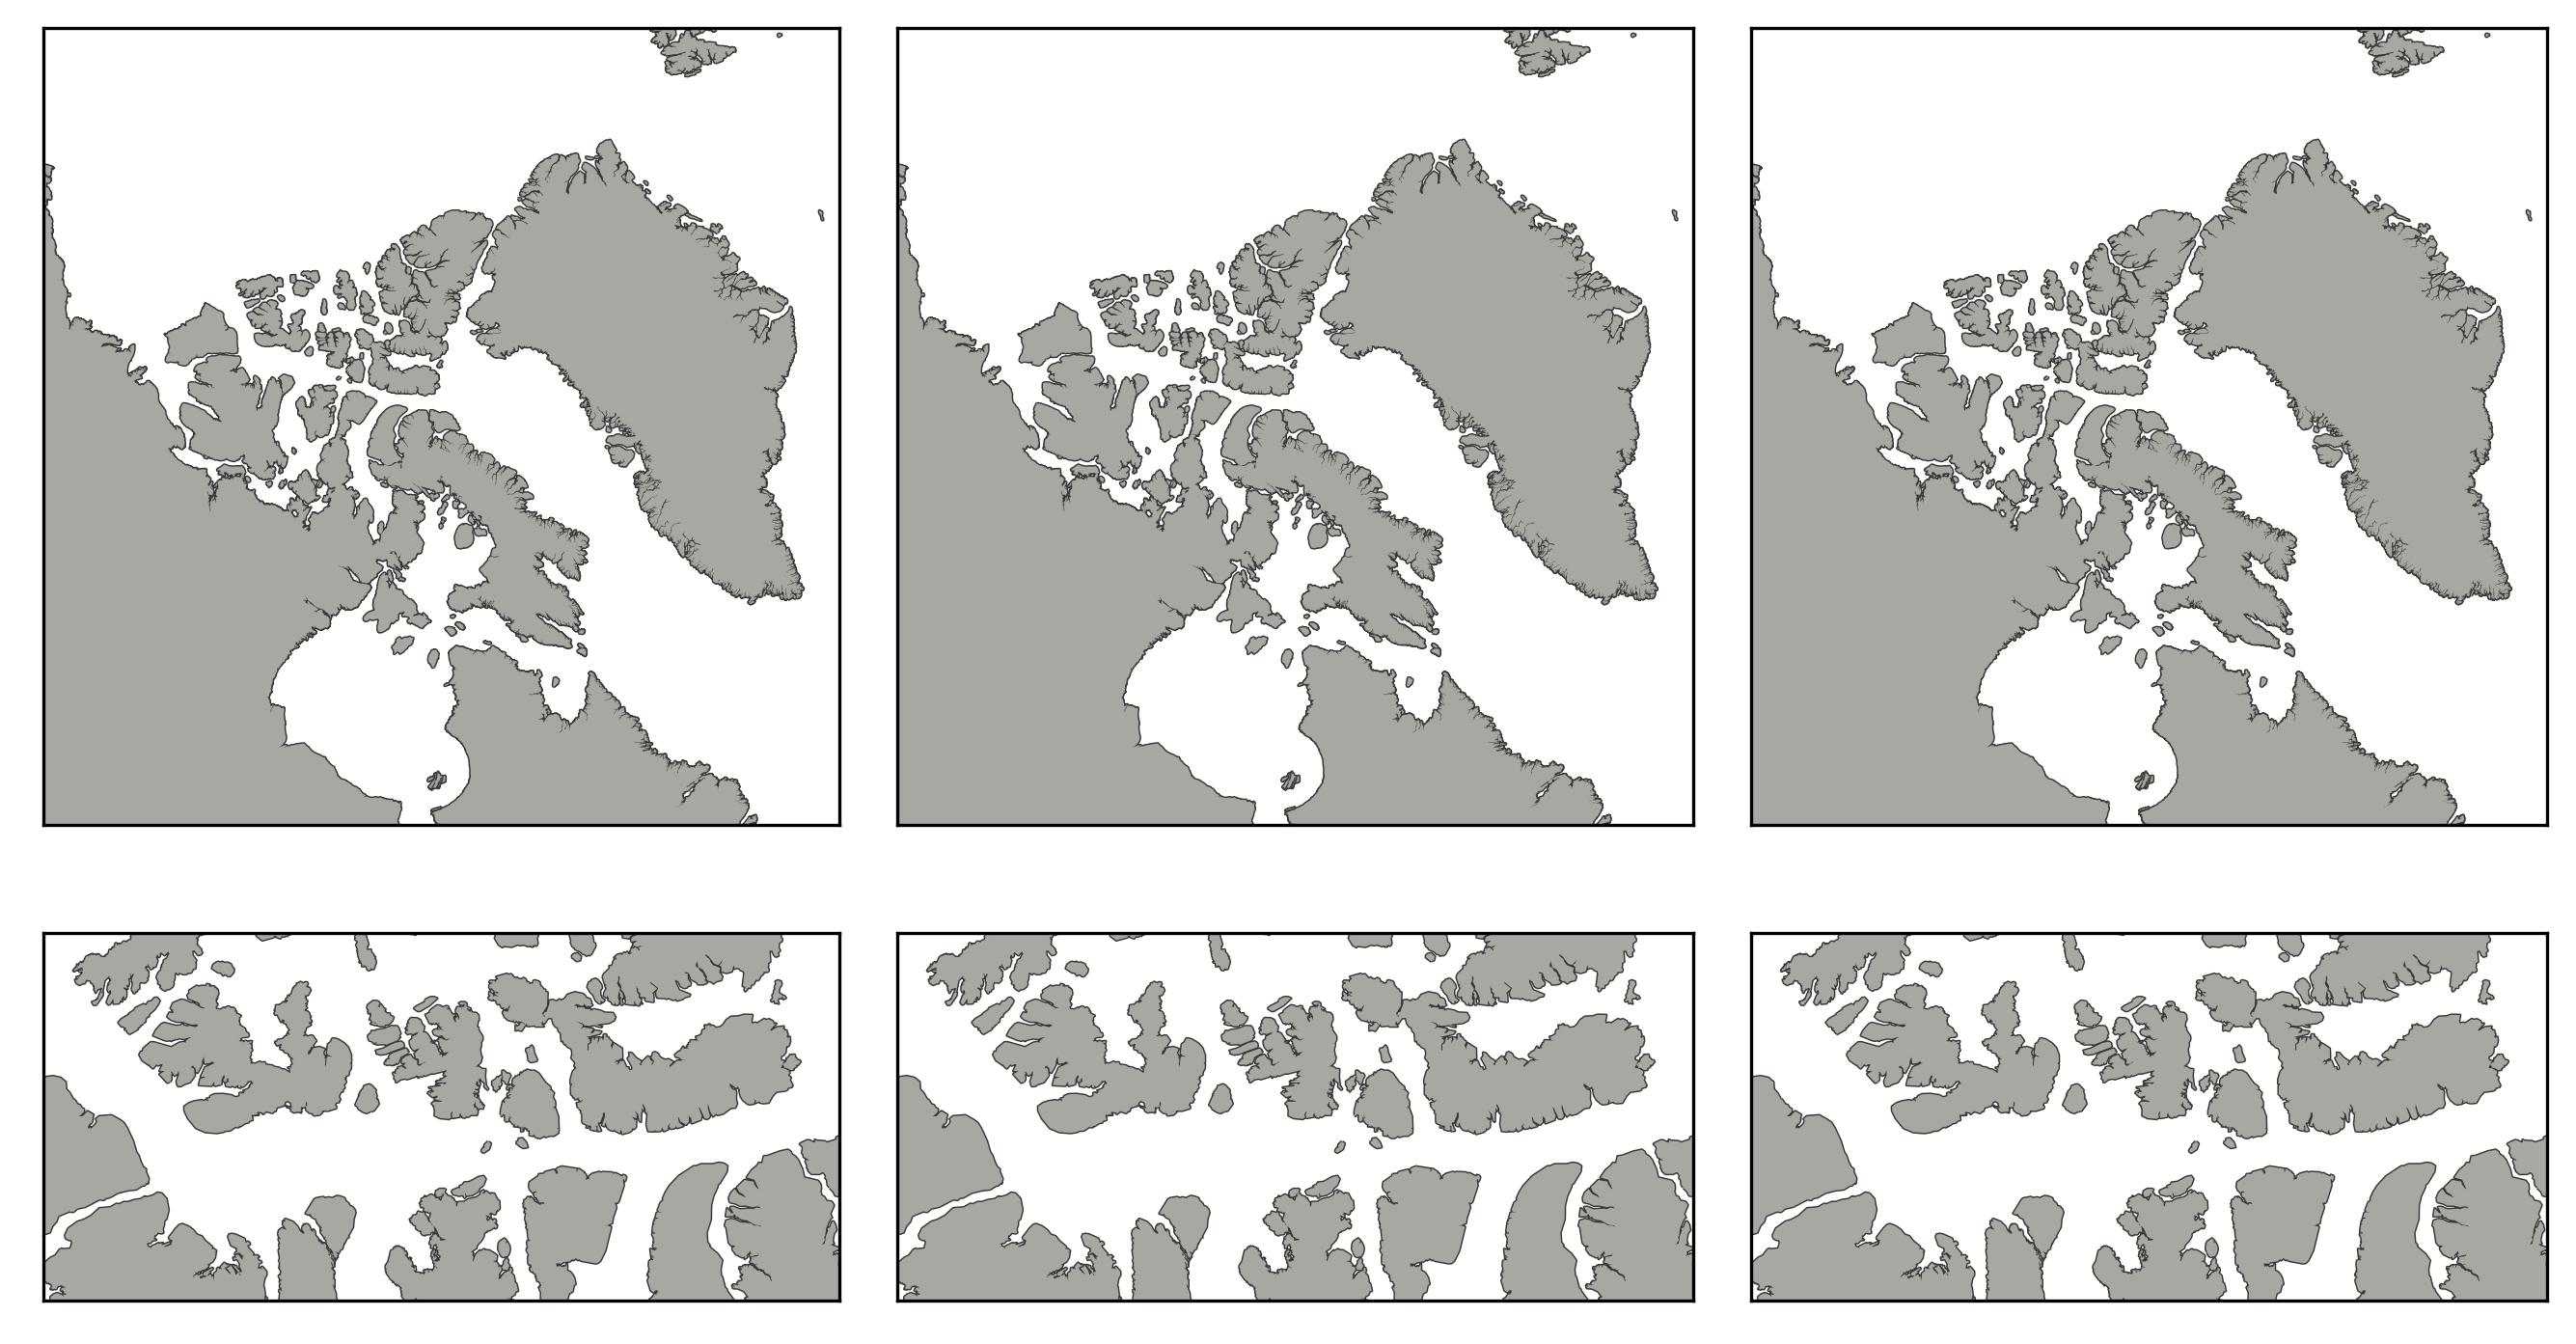

In [8]:
fig, ax = plt.subplots(2,3, figsize=(4.5*2, 3.74*2), dpi=300, gridspec_kw={'height_ratios': [1.5, 1]})

for axis in ax[1,:].ravel():    
    proj2=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -100, resolution='i', width=1.3e6, height=0.6e6, ax=axis)
    proj2.drawcoastlines(color=land_outline_color, linewidth=0.7);
    proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

for axis in ax[0,:].ravel():    
    proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -79, resolution='i', width=4.2e6, height=4.2e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=0.7);
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);
    
plt.tight_layout(h_pad=-10)

# pickle the class instance.
pickle.dump((fig, ax, proj1, proj2), open('/ocean/brogalla/GEOTRACES/pickles/Pb-fields.pickle','wb'))